In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
from rich.jupyter import print
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import scale

In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
sc.__version__

'1.6.0'

In [4]:
from matplotlib.colors import ListedColormap
cols = ["#CCCCCC","#C9B8B8","#C7A4A4","#C59191","#C27D7D","#C06969","#BE5656","#BB4242", "#B92E2E", "#B71B1B"]
col_map = ListedColormap(cols)

## Load data

In [5]:
expr_striatum = sc.read_h5ad("MERFISH_10192020_renamed.h5ad")

In [6]:
expr_striatum.obs.head()

sliceNumber datasetName  \
270042071063326088118870627040956701528          13   200704_D4   
103551627122072073245851421418447753725          13   200313_C4   
139072088797648901237066560348180904517          12   200701_D3   
268736140669032937428209746906723454236           2   200315_C2   
81645940757337081112739058805786368214            8   200315_C2   

                                             clusterLabel StriatumCells  \
270042071063326088118870627040956701528              D2_0     Slice13_D   
103551627122072073245851421418447753725              D1_3     Slice13_C   
139072088797648901237066560348180904517             D1_14     Slice12_D   
268736140669032937428209746906723454236             D1_12      Slice2_C   
81645940757337081112739058805786368214   oligodendrocytes      Slice8_C   

                                                 cellType Batch leiden  \
270042071063326088118870627040956701528                D2     D      7   
103551627122072073245851421418447753725                D1     C      3   
139072088797648901237066560348180904517                D1     D      3   
268736140669032937428209746906723454236                D1     C      6   
81645940757337081112739058805786368214   oligodendrocytes     C      1   

                                           clus           OldAnno  \
270042071063326088118870627040956701528  others              None   
103551627122072073245851421418447753725  others              None   
139072088797648901237066560348180904517  others              None   
268736140669032937428209746906723454236  others              D1_4   
81645940757337081112739058805786368214   others  oligodendrocytes   

                                                  NewAnno  
270042071063326088118870627040956701528            D2_0,2  
103551627122072073245851421418447753725             D1_15  
139072088797648901237066560348180904517             D1_10  
268736140669032937428209746906723454236            D1_0,2  
81645940757337081112739058805786368214   oligodendrocytes

## Select only BatchC slide number 10

In [7]:
expr_striatum_BatchC_slice10 = expr_striatum[expr_striatum.obs.Batch == "C" ]
expr_striatum_BatchC_slice10 = expr_striatum_BatchC_slice10[expr_striatum_BatchC_slice10.obs.sliceNumber == 10]
expr_striatum_BatchC_slice10

View of AnnData object with n_obs × n_vars = 11949 × 253
    obs: 'sliceNumber', 'datasetName', 'clusterLabel', 'StriatumCells', 'cellType', 'Batch', 'leiden', 'clus', 'OldAnno', 'NewAnno'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Batch_colors', 'NewAnno_colors', 'OldAnno_colors', 'StriatumCells_colors', 'cellType_colors', 'clus_colors', 'clusterLabel_colors', 'datasetName_colors', "dendrogram_['leiden']", 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sliceNumber_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

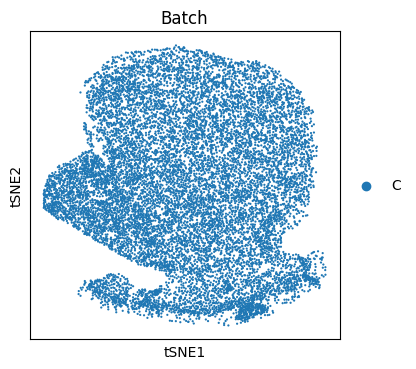

In [7]:
matplotlib.rcParams['figure.figsize'] = [4, 4]
sc.pl.tsne(expr_striatum_BatchC_slice10, color="Batch")

In [32]:
expr_striatum_BatchC_slice10.obs['Density_groups'] = "NotUsed"

In [16]:
expr_striatum_BatchC_slice10.obs.clusterLabel.value_counts

<bound method IndexOpsMixin.value_counts of 279936995525136107459383515741992866205          D2_4
288945687537669596208693350811644171021    astrocytes
136546868056103667779202427988805914018          D2_4
223456034594103766204069523024323988364         D1_12
148126617401601012334555370777337655038         D2_11
                                              ...    
281875714838276721771142002996553247846          D2_5
55131030600026072873612204419020742078           D1_9
295605178815902196865759617241693992586          D1_0
83823616905490869232786834956113611564           D2_1
251593796594521703906293053806466766854          D2_1
Name: clusterLabel, Length: 11949, dtype: category
Categories (48, object): [astrocytes, D1_0, D1_1, D1_10, ..., microglia, oligodendrocytes, OPCs, nan]>

In [33]:
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_0","D1_3","D1_9","D1_14"])] = "D1_0_3_9_14"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_1","D1_4","D1_6","D1_8"])] = "D1_1_4_6_8"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_5","D1_10","D1_11","D1_12"])] = "D1_5_10_11_12"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_2","D1_7","D1_13"])] = "D1_2_7_13"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_0","D2_4","D2_6","D2_7","D2_10"])] = "D2_0_4_6_7_10"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_1"])] = "D2_1"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_2","D2_9"])] = "D2_2_9"
expr_striatum_BatchC_slice10.obs.Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_5"])] = "D2_5"
expr_striatum_BatchC_slice10.obs.Density_groups.value_counts

/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

<bound method IndexOpsMixin.value_counts of 279936995525136107459383515741992866205    D2_0_4_6_7_10
288945687537669596208693350811644171021          NotUsed
136546868056103667779202427988805914018    D2_0_4_6_7_10
223456034594103766204069523024323988364    D1_5_10_11_12
148126617401601012334555370777337655038          NotUsed
                                               ...      
281875714838276721771142002996553247846             D2_5
55131030600026072873612204419020742078       D1_0_3_9_14
295605178815902196865759617241693992586      D1_0_3_9_14
83823616905490869232786834956113611564              D2_1
251593796594521703906293053806466766854             D2_1
Name: Density_groups, Length: 11949, dtype: object>

... storing 'Density_groups' as categorical


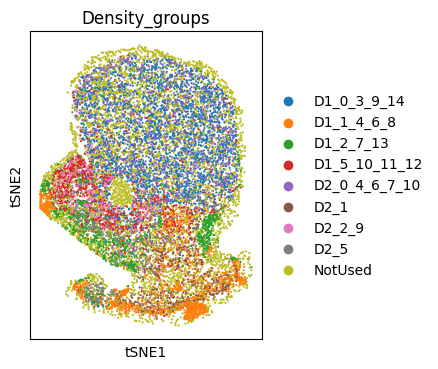

In [34]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.tsne(expr_striatum_BatchC_slice10, color="Density_groups")

In [35]:
sc.tl.embedding_density(expr_striatum_BatchC_slice10, basis='tsne', groupby='Density_groups')

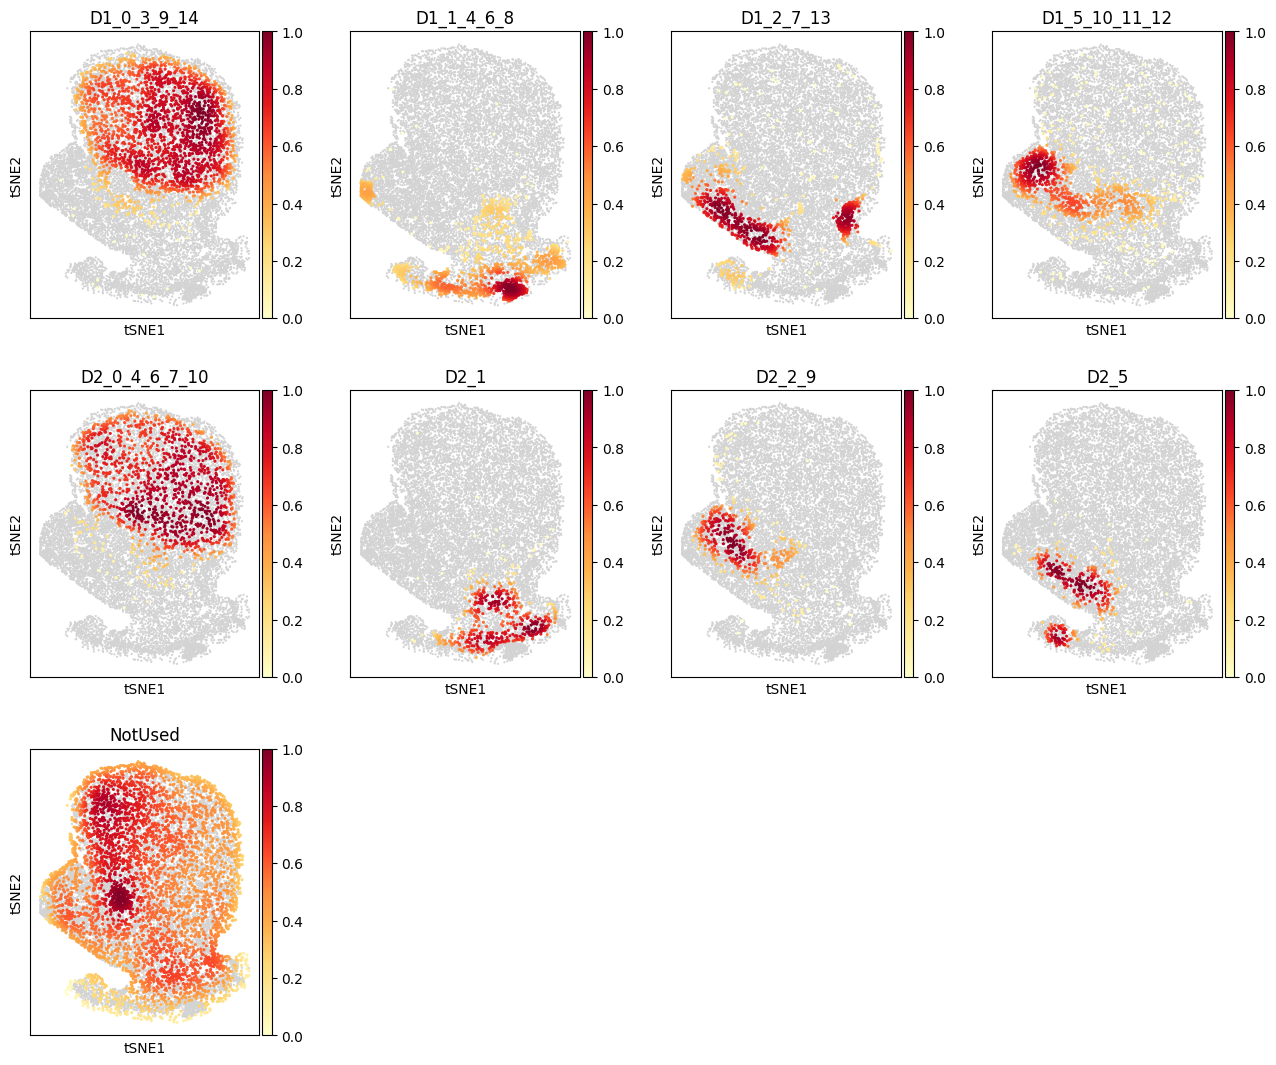

In [37]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice10, basis='tsne', key='tsne_density_Density_groups',bg_dotsize=10,fg_dotsize=20,save="Cluster_densities.pdf")

## Some Fig.6 density maps

In [14]:
expr_striatum_BatchC_slice10.obs['Fig6_Density_groups'] = "NotUsed"

expr_striatum_BatchC_slice10.obs.Fig6_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_0","D1_12"])] = "D1_0_12"
expr_striatum_BatchC_slice10.obs.Fig6_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_0","D2_9"])] = "D2_0_9"
expr_striatum_BatchC_slice10.obs.Fig6_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_1","D1_2","D1_5","D1_7","D1_10","D1_11","D1_13"])] = "D1_1_2_5_7_10_11_13"
expr_striatum_BatchC_slice10.obs.Fig6_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_1","D2_5","D2_2"])] = "D2_1_5_2"
expr_striatum_BatchC_slice10.obs.Fig6_Density_groups.value_counts

/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

<bound method IndexOpsMixin.value_counts of 279936995525136107459383515741992866205     NotUsed
288945687537669596208693350811644171021     NotUsed
136546868056103667779202427988805914018     NotUsed
223456034594103766204069523024323988364     D1_0_12
148126617401601012334555370777337655038     NotUsed
                                             ...   
281875714838276721771142002996553247846    D2_1_5_2
55131030600026072873612204419020742078      NotUsed
295605178815902196865759617241693992586     D1_0_12
83823616905490869232786834956113611564     D2_1_5_2
251593796594521703906293053806466766854    D2_1_5_2
Name: Fig6_Density_groups, Length: 11949, dtype: object>

In [12]:
sc.tl.embedding_density(expr_striatum_BatchC_slice10, basis='tsne', groupby='Fig6_Density_groups')

... storing 'Fig6_Density_groups' as categorical


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

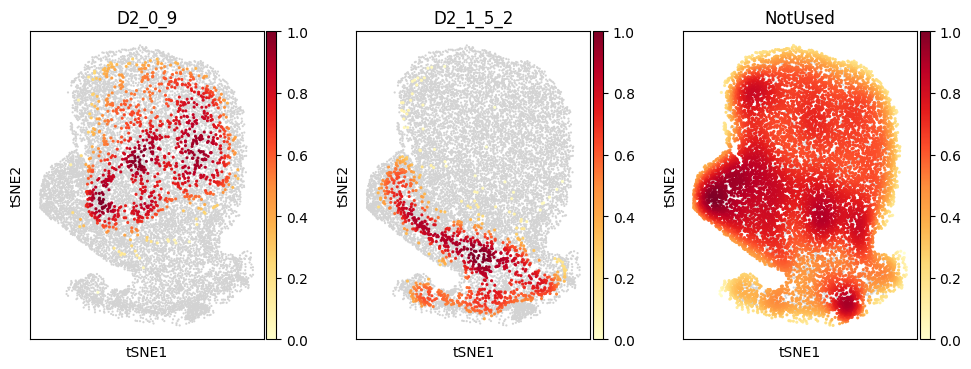

In [13]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice10, basis='tsne', key='tsne_density_Fig6_Density_groups',bg_dotsize=10,fg_dotsize=20,save="Fig6_Cluster_densities_D2_groups.pdf")

In [58]:
expr_striatum_BatchC_slice10.obs['Fig6_individual_groups'] = "NotUsed"

expr_striatum_BatchC_slice10.obs.Fig6_individual_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_0"])] = "D1_0"
expr_striatum_BatchC_slice10.obs.Fig6_individual_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_12"])] = "D1_12"
expr_striatum_BatchC_slice10.obs.Fig6_individual_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_0"])] = "D2_0"
expr_striatum_BatchC_slice10.obs.Fig6_individual_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D2_9"])] = "D2_9"

/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [59]:
sc.tl.embedding_density(expr_striatum_BatchC_slice10, basis='tsne', groupby='Fig6_individual_groups')

... storing 'Fig6_individual_groups' as categorical


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

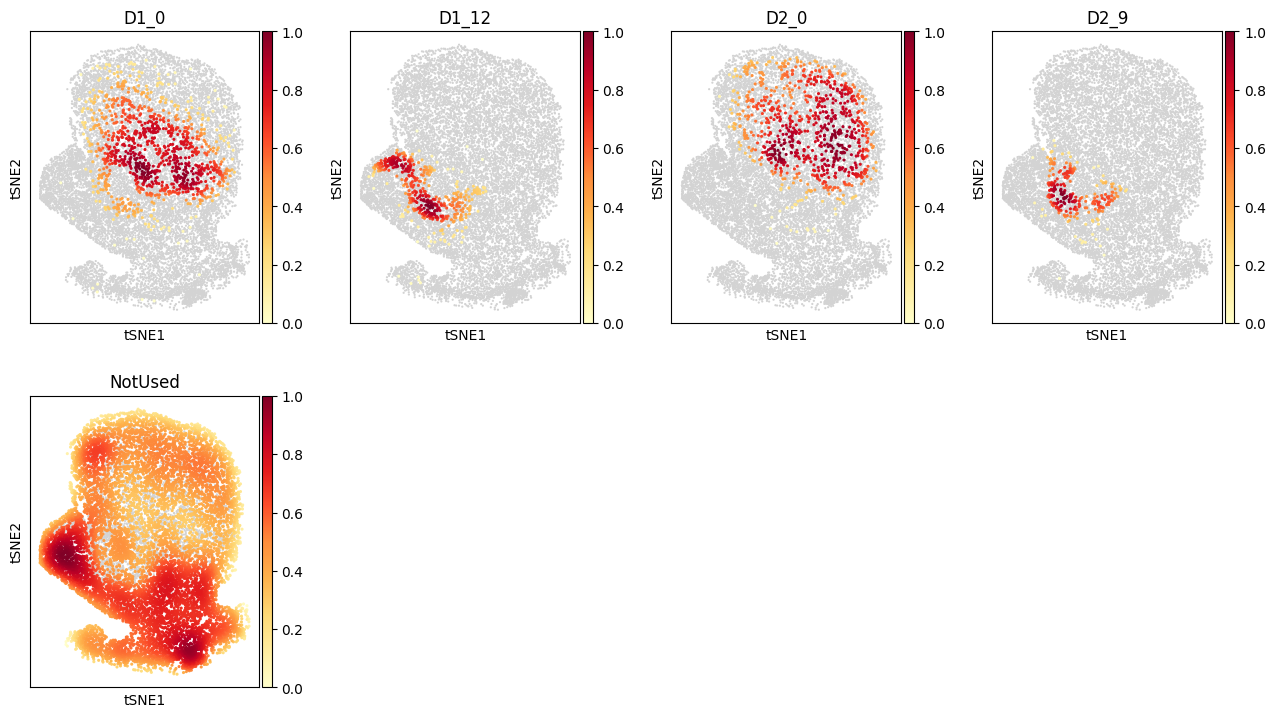

In [60]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice10, basis='tsne', key='tsne_density_Fig6_individual_groups',bg_dotsize=10,fg_dotsize=20,save="Fig6F_Clusters_densities.pdf")

## Some Additional densities slice 10 and 9

In [16]:
expr_striatum_BatchC_slice10.obs['Additional_Density_groups'] = "NotUsed"

expr_striatum_BatchC_slice10.obs.Additional_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_10","D1_11","D2_2"])] = "D1_10_11_D2_2"
expr_striatum_BatchC_slice10.obs.Additional_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_13","D2_5"])] = "D1_13_D2_5"
expr_striatum_BatchC_slice10.obs.Additional_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_5"])] = "D1_5"
expr_striatum_BatchC_slice10.obs.Additional_Density_groups[expr_striatum_BatchC_slice10.obs.clusterLabel.isin(["D1_2"])] = "D1_2"
expr_striatum_BatchC_slice10.obs.Additional_Density_groups.value_counts

/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

<bound method IndexOpsMixin.value_counts of 279936995525136107459383515741992866205       NotUsed
288945687537669596208693350811644171021       NotUsed
136546868056103667779202427988805914018       NotUsed
223456034594103766204069523024323988364       NotUsed
148126617401601012334555370777337655038       NotUsed
                                              ...    
281875714838276721771142002996553247846    D1_13_D2_5
55131030600026072873612204419020742078        NotUsed
295605178815902196865759617241693992586       NotUsed
83823616905490869232786834956113611564        NotUsed
251593796594521703906293053806466766854       NotUsed
Name: Additional_Density_groups, Length: 11949, dtype: object>

In [17]:
sc.tl.embedding_density(expr_striatum_BatchC_slice10, basis='tsne', groupby='Additional_Density_groups')

... storing 'Fig6_Density_groups' as categorical
... storing 'Additional_Density_groups' as categorical


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

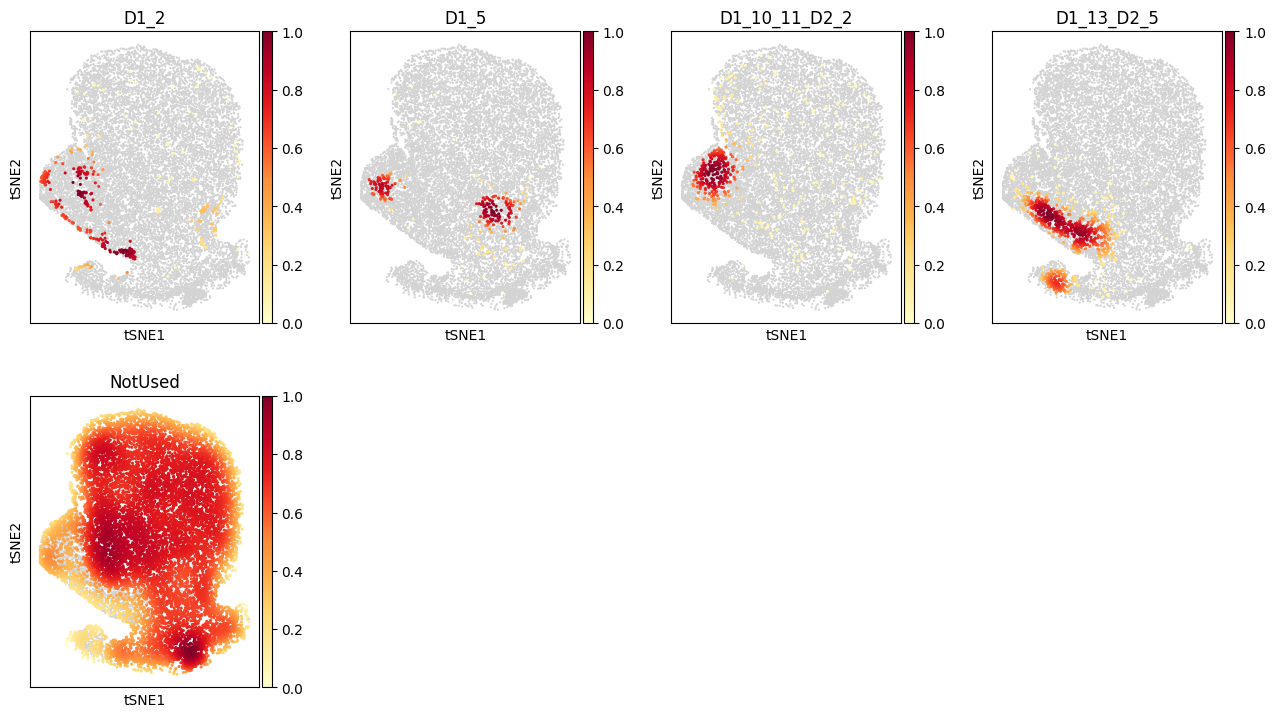

In [18]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice10, basis='tsne', 
	                     key='tsne_density_Additional_Density_groups',
	                     bg_dotsize=10,fg_dotsize=20,
	                     save="Additional_Density_groups_slice10.pdf")

In [19]:
expr_striatum_BatchC_slice9 = expr_striatum[expr_striatum.obs.Batch == "C" ]
expr_striatum_BatchC_slice9 = expr_striatum_BatchC_slice9[expr_striatum_BatchC_slice9.obs.sliceNumber == 9]
expr_striatum_BatchC_slice9

View of AnnData object with n_obs × n_vars = 10388 × 253
    obs: 'sliceNumber', 'datasetName', 'clusterLabel', 'StriatumCells', 'cellType', 'Batch', 'leiden', 'clus', 'OldAnno', 'NewAnno'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Batch_colors', 'NewAnno_colors', 'OldAnno_colors', 'StriatumCells_colors', 'cellType_colors', 'clus_colors', 'clusterLabel_colors', 'datasetName_colors', "dendrogram_['leiden']", 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sliceNumber_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
expr_striatum_BatchC_slice9.obs['Additional_Density_groups'] = "NotUsed"

expr_striatum_BatchC_slice9.obs.Additional_Density_groups[expr_striatum_BatchC_slice9.obs.clusterLabel.isin(["D1_10","D1_11","D2_2"])] = "D1_10_11_D2_2"
expr_striatum_BatchC_slice9.obs.Additional_Density_groups[expr_striatum_BatchC_slice9.obs.clusterLabel.isin(["D1_13","D2_5"])] = "D1_13_D2_5"
expr_striatum_BatchC_slice9.obs.Additional_Density_groups[expr_striatum_BatchC_slice9.obs.clusterLabel.isin(["D1_5"])] = "D1_5"
expr_striatum_BatchC_slice9.obs.Additional_Density_groups[expr_striatum_BatchC_slice9.obs.clusterLabel.isin(["D1_2"])] = "D1_2"
expr_striatum_BatchC_slice9.obs.Additional_Density_groups.value_counts

Trying to set attribute `.obs` of view, copying.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

<bound method IndexOpsMixin.value_counts of 194110149165846252137311737805871335415       NotUsed
257642274202675542414341248252740230958          D1_5
71801645375585708800278579892561186757        NotUsed
145761210920414193862954685695090503444       NotUsed
244821219247690009894122682150249680289       NotUsed
                                              ...    
222749952898335577349180216814116643355       NotUsed
288085972354391639459362778177390639705       NotUsed
17821730051808014021372538637856368952        NotUsed
110083138807279292382323121270965495269    D1_13_D2_5
191853081336470202465440357798231844708       NotUsed
Name: Additional_Density_groups, Length: 10388, dtype: object>

In [21]:
sc.tl.embedding_density(expr_striatum_BatchC_slice9, basis='tsne', groupby='Additional_Density_groups')

... storing 'Additional_Density_groups' as categorical


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

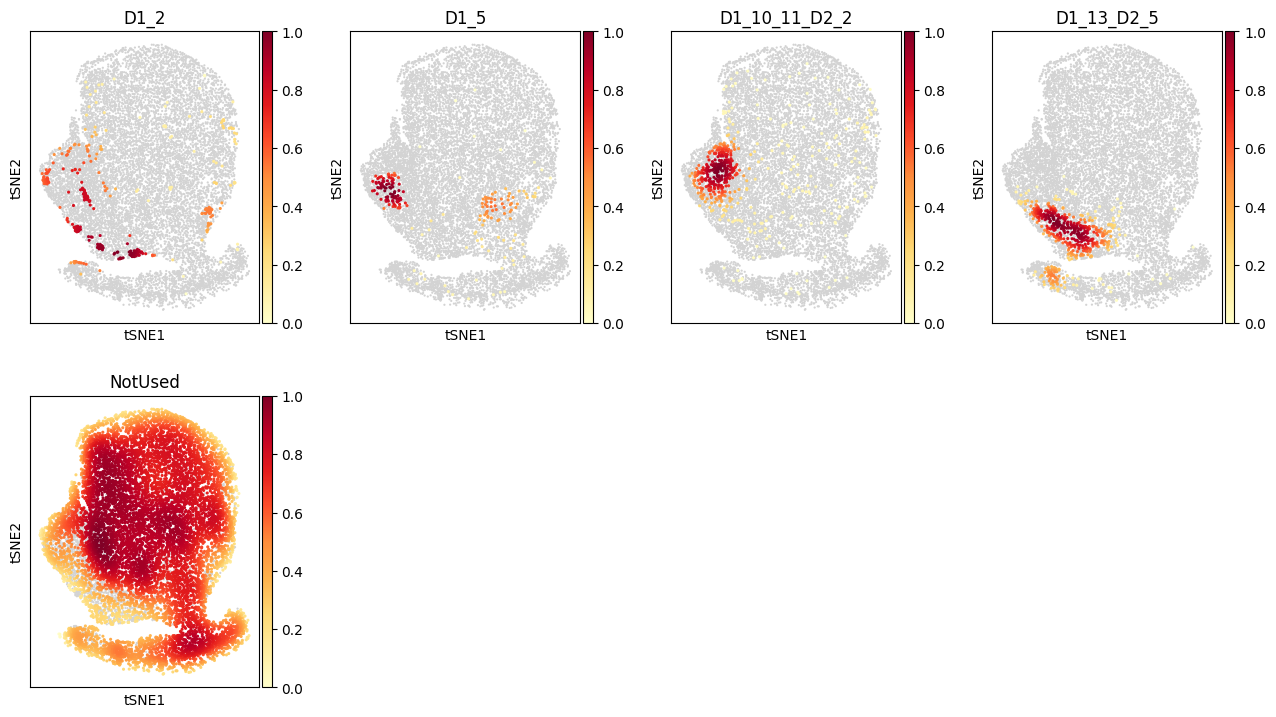

In [22]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice9, basis='tsne', 
	                     key='tsne_density_Additional_Density_groups',
	                     bg_dotsize=10,fg_dotsize=20,
	                     save="Additional_Density_groups_slice9.pdf")

## Plot Density of D1 and D2

In [9]:
sc.tl.embedding_density(expr_striatum_BatchC_slice10, basis='tsne', groupby='cellType')

Trying to set attribute `.obs` of view, copying.


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

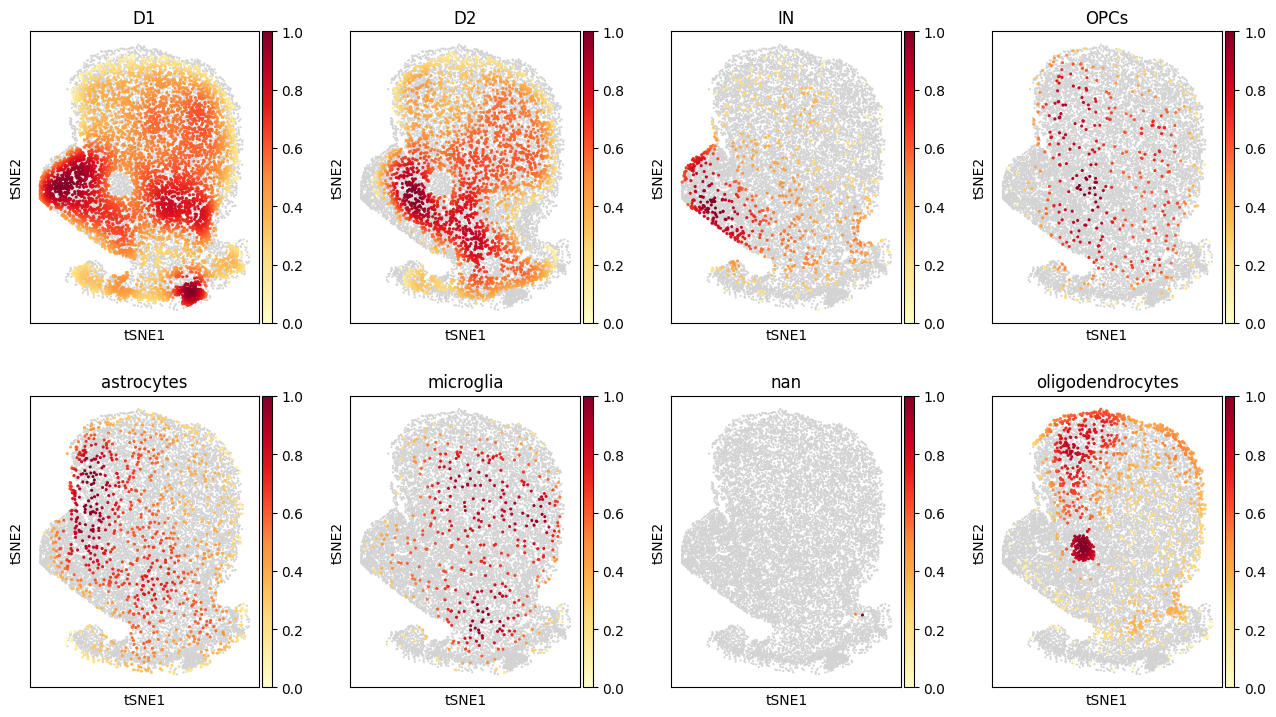

In [10]:
matplotlib.rcParams['figure.figsize'] = [3, 4]
sc.pl.embedding_density( expr_striatum_BatchC_slice10, basis='tsne', key='tsne_density_cellType',bg_dotsize=10,fg_dotsize=20,save="R3_cellType_densities.pdf")

#### Plot Density of the whole dataset

In [11]:
expr_striatum_BatchC = expr_striatum[expr_striatum.obs.Batch == "C" ]

In [12]:
sc.tl.embedding_density(expr_striatum_BatchC, basis='tsne', groupby='cellType')

Trying to set attribute `.obs` of view, copying.


/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/netscr/nadhir/anaconda3/envs/r36_py/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: MatplotlibDeprecationWarning: Passing pa

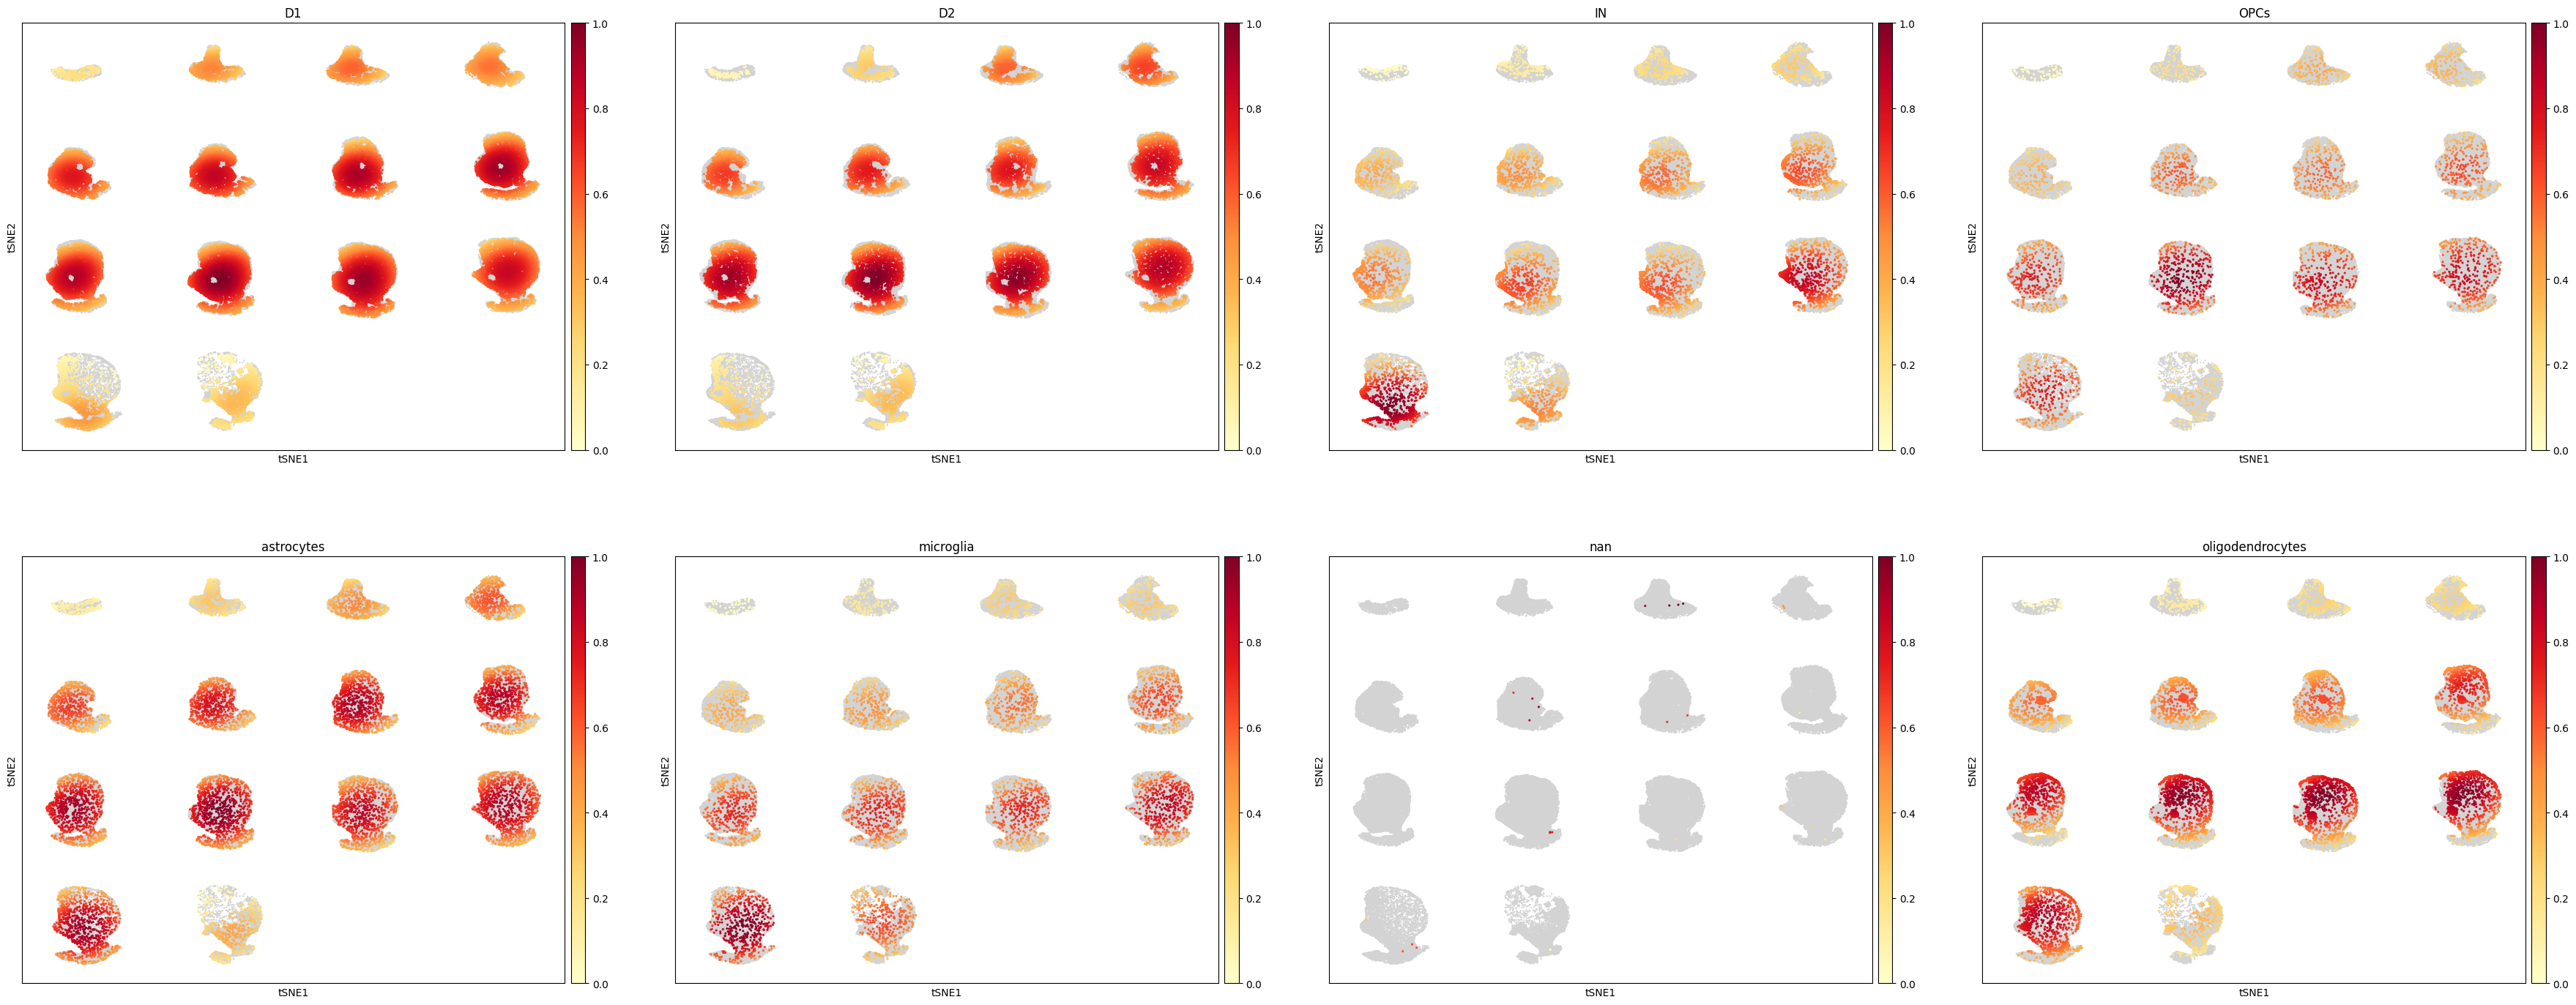

In [13]:
matplotlib.rcParams['figure.figsize'] = [10, 8]
sc.pl.embedding_density( expr_striatum_BatchC, basis='tsne', key='tsne_density_cellType',bg_dotsize=10,fg_dotsize=20,save="R3_cellType_densities.pdf")

## Plot Tszh1 and Th in only MSN

In [39]:
expr_striatum_MSN = expr_striatum[expr_striatum.obs.cellType.isin(["D1","D2"]) ]
expr_striatum_MSN.obs.cellType.value_counts

<bound method IndexOpsMixin.value_counts of 270042071063326088118870627040956701528    D2
103551627122072073245851421418447753725    D1
139072088797648901237066560348180904517    D1
268736140669032937428209746906723454236    D1
197437949745504478723575359089176185027    D1
                                           ..
78770029206325611389189337277972119231     D1
268975177461129324336759488866384703987    D1
43716603802169098668190691652964275913     D1
137318415225060181332905890683007513511    D1
275284394728532838871659710230732338352    D1
Name: cellType, Length: 129361, dtype: category
Categories (2, object): [D1, D2]>

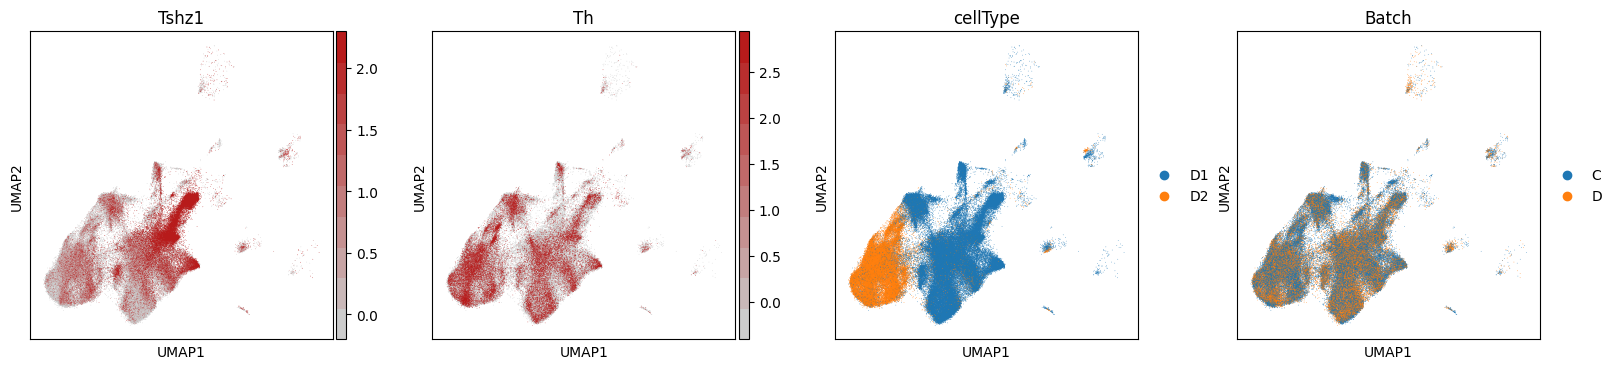

In [53]:
plt.style.use('default')
matplotlib.rcParams['figure.figsize'] = [4, 4]
sc.pl.umap(expr_striatum_MSN, color=['Tshz1',"Th","cellType","Batch"], color_map  =col_map, use_raw=False,vmin='p50',vmax="p99",save="Fig5H_Tshz1_Th_tSNE.pdf")

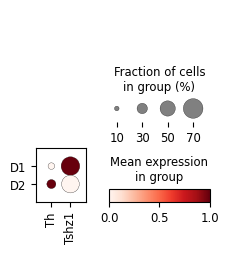

In [51]:
matplotlib.rcParams['figure.figsize'] = [6, 2]
markers = ['Th',"Tshz1"]
dp= sc.pl.dotplot(expr_striatum_MSN, markers, groupby='cellType', dendrogram=True,log=True,standard_scale='var',save="Tszh1_Th_dotplot_MSN.pdf")
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

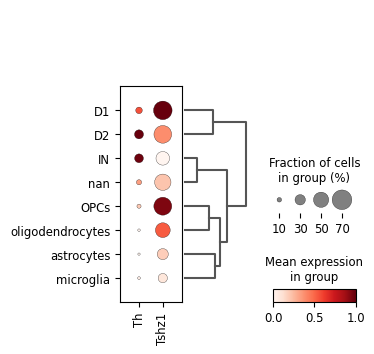

In [52]:
matplotlib.rcParams['figure.figsize'] = [6, 2]
markers = ['Th',"Tshz1"]
dp= sc.pl.dotplot(expr_striatum, markers, groupby='cellType', dendrogram=True,log=False,standard_scale='var',save="Tszh1_Th_dotplot_All.pdf")
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

## Plot Cocaine DEG

In [82]:
merFISH_cocaineDEG= sc.read_h5ad("merFISH_sobj_cocaineDEG.h5ad")

In [83]:
merFISH_cocaineDEG

AnnData object with n_obs × n_vars = 102534 × 253
    obs: 'sliceNumber', 'datasetName', 'clusterLabel', 'StriatumCells', 'cellType', 'Batch', 'leiden', 'clus', 'OldAnno', 'NewAnno', 'nCount_RNA', 'nFeature_RNA', 'withdraw_48h_D1', 'Maintenance_D2', 'withdraw_15d_D2', 'withdraw_48h_D2', 'Maintenance_D1', 'withdraw_15d_D1'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [102]:
cmap = matplotlib.cm.get_cmap('Spectral_r', 20)    # PiYG

cols2 = ["#CCCCCC"]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    cols2.append(matplotlib.colors.rgb2hex(rgba))
    #print(matplotlib.colors.rgb2hex(rgba))

col_map2 = ListedColormap(cols2)

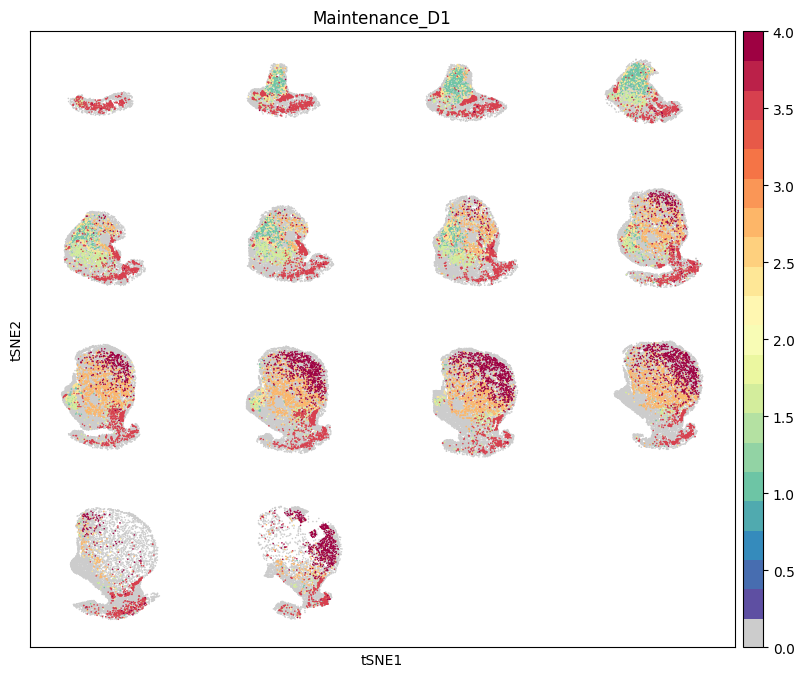

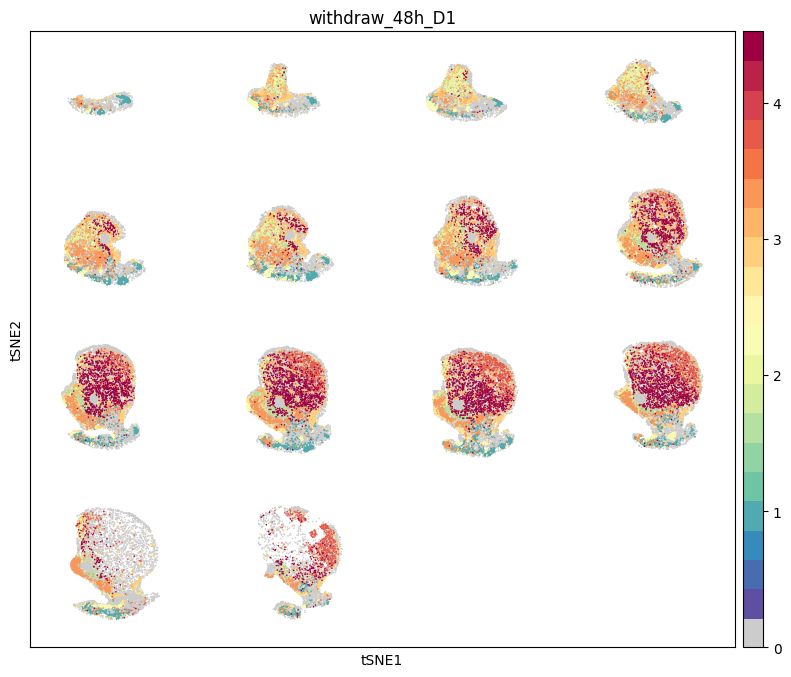

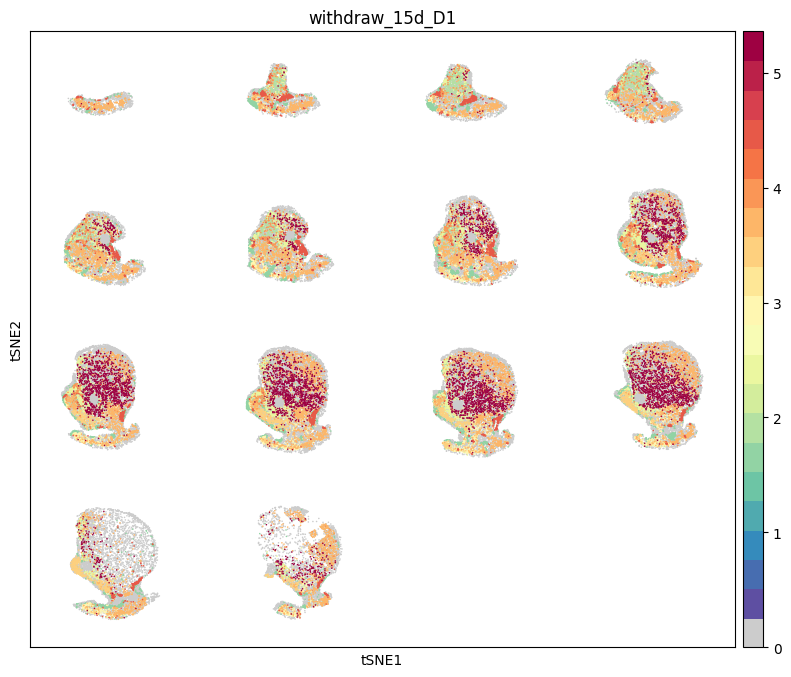

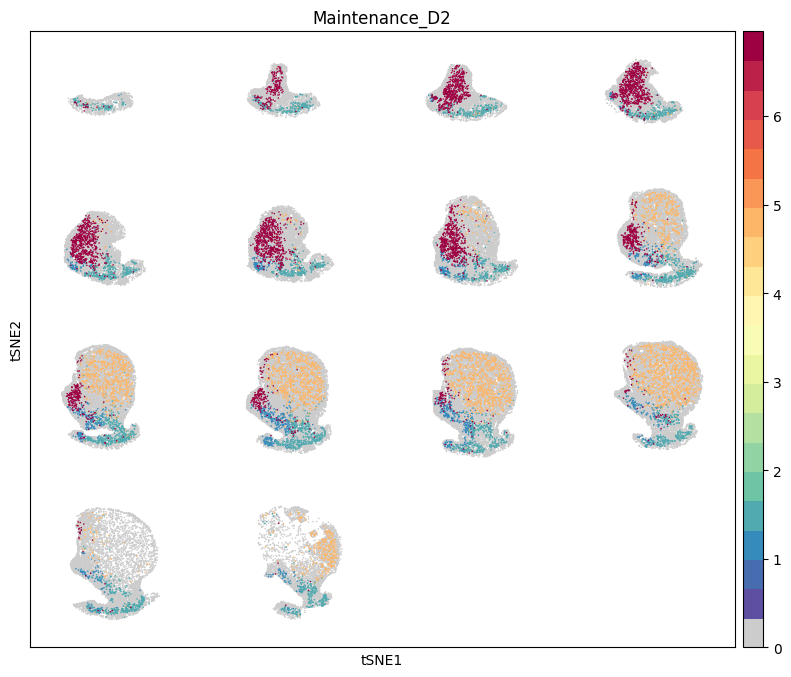

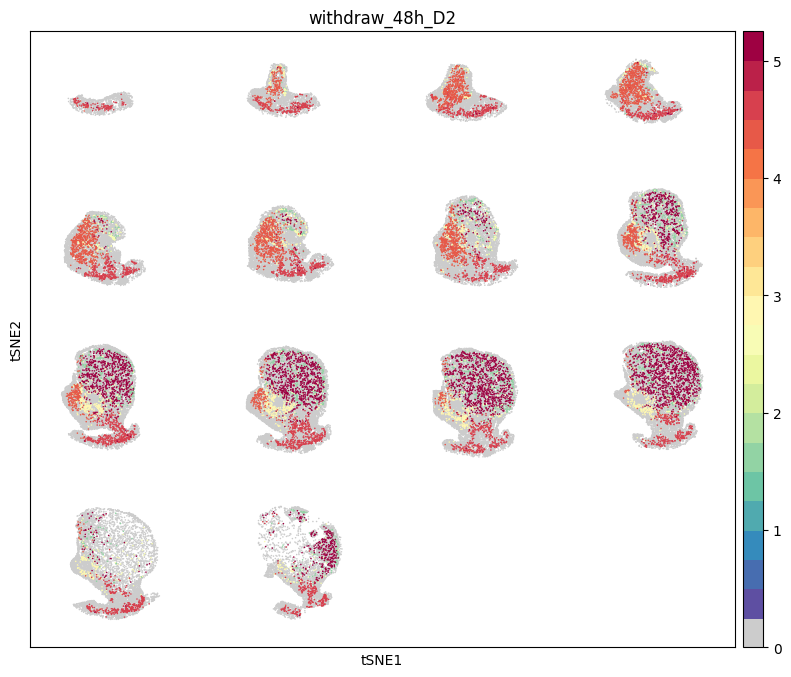

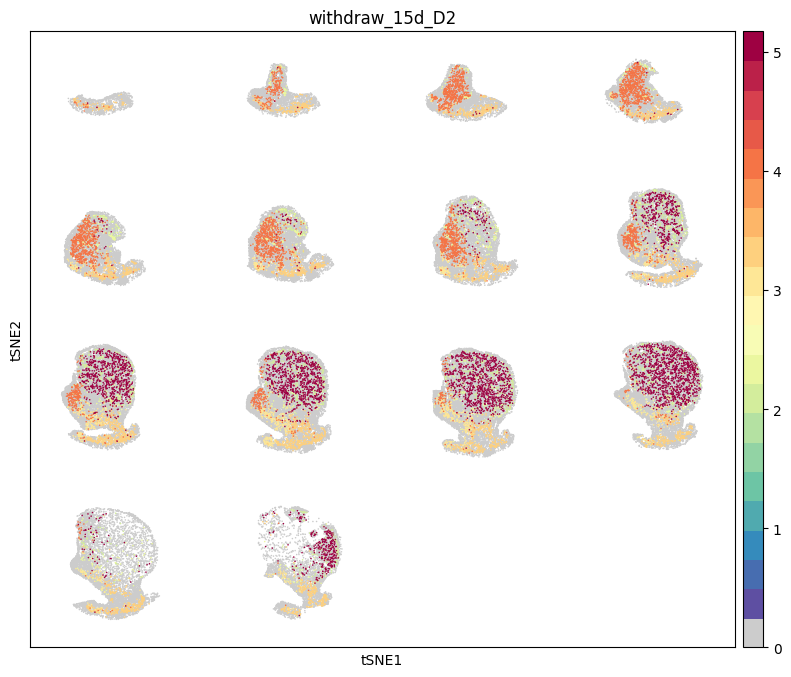

In [103]:
matplotlib.rcParams['figure.figsize'] = [10, 8]
for period in ["Maintenance_D1","withdraw_48h_D1","withdraw_15d_D1","Maintenance_D2","withdraw_48h_D2","withdraw_15d_D2"]:
    fout = "DEG_{}_merFISH_jet.png".format(period)
    sc.pl.tsne(merFISH_cocaineDEG, color=[period],
               color_map  =col_map2, 
               use_raw=False, 
               size=5,
               ncols=1#,
               #save=fout
              )
